<a href="https://colab.research.google.com/github/Pushkarp26/Machine-Learning-of-energy-use-of-appliances-in-alow-energy-house/blob/main/1_Feature_selection_%26_Liner_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta as td
import matplotlib.pyplot as plt
import math
from google.colab import files

In [5]:
df = pd.read_csv('new_df.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
print(df.head())

                  Date  Appliances  ...  Weekday(1)/Weekend(0)  Hour
0  2016-01-11 17:00:00          60  ...                      1    17
1  2016-01-11 17:10:00          60  ...                      1    17
2  2016-01-11 17:20:00          50  ...                      1    17
3  2016-01-11 17:30:00          50  ...                      1    17
4  2016-01-11 17:40:00          60  ...                      1    17

[5 rows x 36 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      19735 non-null  object 
 1   Appliances                19735 non-null  int64  
 2   lights                    19735 non-null  int64  
 3   Kitchen_Temp              19735 non-null  float64
 4   Kitchen_Humidity          19735 non-null  float64
 5   Living_room_Temp          19735 non-null  float64
 6   Living_room_Humidity      19735 non-null  float64
 7   Laundry_room Temp         19735 non-null  float64
 8   Laundry_room_Humidity     19735 non-null  float64
 9   Office_Temp               19735 non-null  float64
 10  Office_Humidity           19735 non-null  float64
 11  Bathroom_Temp             19735 non-null  float64
 12  Bathroom_Humidity         19735 non-null  float64
 13  Building_North_Temp       19735 non-null  float64
 14  Buildi

In [7]:

df['Date'] = pd.to_datetime(df['Date'], 
                           format='%Y-%m-%d %H:%M:%S')
df['Date']

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: Date, Length: 19735, dtype: datetime64[ns]

In [8]:
m = df.Date.dt.minute*60

In [9]:
h = df.Date.dt.hour*3600

In [10]:
s = m+h
s.to_list
print(s)

0        61200
1        61800
2        62400
3        63000
4        63600
         ...  
19730    62400
19731    63000
19732    63600
19733    64200
19734    64800
Name: Date, Length: 19735, dtype: int64


In [11]:
df['NSM'] = s
print(df.head())

                 Date  Appliances  lights  ...  Weekday(1)/Weekend(0)  Hour    NSM
0 2016-01-11 17:00:00          60      30  ...                      1    17  61200
1 2016-01-11 17:10:00          60      30  ...                      1    17  61800
2 2016-01-11 17:20:00          50      30  ...                      1    17  62400
3 2016-01-11 17:30:00          50      40  ...                      1    17  63000
4 2016-01-11 17:40:00          60      40  ...                      1    17  63600

[5 rows x 37 columns]


In [12]:
df.columns

Index(['Date', 'Appliances', 'lights', 'Kitchen_Temp', 'Kitchen_Humidity',
       'Living_room_Temp', 'Living_room_Humidity', 'Laundry_room Temp',
       'Laundry_room_Humidity', 'Office_Temp', 'Office_Humidity',
       'Bathroom_Temp', 'Bathroom_Humidity', 'Building_North_Temp',
       'Building_North_Humidity', 'Ironing_room_Temp',
       'Ironing _room_Humidity', 'Childrens_room_Temp',
       'Childrens_room_Humidity', 'Parents_room_Temp', 'Parents_room_Humidity',
       'Outside_Temp', 'Outside_Press', 'Outside_Humidity', 'Windspeed',
       'Visibility', 'Dewpoint_Temp', 'rv1', 'rv2', 'Total_Energy_Consumption',
       'Month_of_year', 'Week_of_year', 'Day', 'Day_of_week',
       'Weekday(1)/Weekend(0)', 'Hour', 'NSM'],
      dtype='object')

In [13]:
df1 = pd.read_csv('new_energy_df.csv')
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1['Date'] = pd.to_datetime(df1['Date'], 
                           format='%Y-%m-%d %H:%M:%S')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      19735 non-null  datetime64[ns]
 1   Appliances                19735 non-null  int64         
 2   lights                    19735 non-null  int64         
 3   Kitchen_Temp              19735 non-null  float64       
 4   Kitchen_Humidity          19735 non-null  float64       
 5   Living_room_Temp          19735 non-null  float64       
 6   Living_room_Humidity      19735 non-null  float64       
 7   Laundry_room Temp         19735 non-null  float64       
 8   Laundry_room_Humidity     19735 non-null  float64       
 9   Office_Temp               19735 non-null  float64       
 10  Office_Humidity           19735 non-null  float64       
 11  Bathroom_Temp             19735 non-null  float64       
 12  Bathroom_Humidity 

In [14]:
df1['Weekday'] = df1.Date.dt.weekday
df1['Weekstatus'] = df[['Weekday(1)/Weekend(0)']]
df1['Day_of_week'] = df[['Day_of_week']]
df1['NSM'] = df[['NSM']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      19735 non-null  datetime64[ns]
 1   Appliances                19735 non-null  int64         
 2   lights                    19735 non-null  int64         
 3   Kitchen_Temp              19735 non-null  float64       
 4   Kitchen_Humidity          19735 non-null  float64       
 5   Living_room_Temp          19735 non-null  float64       
 6   Living_room_Humidity      19735 non-null  float64       
 7   Laundry_room Temp         19735 non-null  float64       
 8   Laundry_room_Humidity     19735 non-null  float64       
 9   Office_Temp               19735 non-null  float64       
 10  Office_Humidity           19735 non-null  float64       
 11  Bathroom_Temp             19735 non-null  float64       
 12  Bathroom_Humidity 

In [15]:
print(df1.head())

                 Date  Appliances  lights  ...  Weekstatus  Day_of_week    NSM
0 2016-01-11 17:00:00          60      30  ...           1       Monday  61200
1 2016-01-11 17:10:00          60      30  ...           1       Monday  61800
2 2016-01-11 17:20:00          50      30  ...           1       Monday  62400
3 2016-01-11 17:30:00          50      40  ...           1       Monday  63000
4 2016-01-11 17:40:00          60      40  ...           1       Monday  63600

[5 rows x 34 columns]


In [17]:
df1.to_csv('Data_1.csv')
files.download('Data_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install Boruta

In [ ]:
df1.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,
            28,30,33]].values

array([[1.98900000e+01, 4.75966667e+01, 1.92000000e+01, ...,
        1.32754332e+01, 0.00000000e+00, 6.12000000e+04],
       [1.98900000e+01, 4.66933333e+01, 1.92000000e+01, ...,
        1.86061950e+01, 0.00000000e+00, 6.18000000e+04],
       [1.98900000e+01, 4.63000000e+01, 1.92000000e+01, ...,
        2.86426682e+01, 0.00000000e+00, 6.24000000e+04],
       ...,
       [2.55000000e+01, 4.65966667e+01, 2.56285714e+01, ...,
        2.91991171e+01, 4.00000000e+00, 6.36000000e+04],
       [2.55000000e+01, 4.69900000e+01, 2.54140000e+01, ...,
        6.32278365e+00, 4.00000000e+00, 6.42000000e+04],
       [2.55000000e+01, 4.66000000e+01, 2.52642857e+01, ...,
        3.41188506e+01, 4.00000000e+00, 6.48000000e+04]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

X = df1.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
                ,27,28,30,33]]
y = df[['Total_Energy_Consumption']]

In [ ]:
X.to_csv("predictor.csv")
y.to_csv("target.csv")
files.download("predictor.csv")
files.download("target.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# y = y.ravel()

In [ ]:
# rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# # define Boruta feature selection method
# feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# # find all relevant features - 5 features should be selected
# feat_selector.fit(X, y)

# # check selected features - first 5 features are selected
# feat_selector.support_

# # check ranking of features
# feat_selector.ranking_

# # call transform() on X to filter it down to selected features
# X_filtered = feat_selector.transform(X)

In [ ]:
# feat_selector.support_

In [ ]:
# feat_selector.ranking_


In [ ]:
# feat_selector.n_features_

#**FEATURE SCALING**

#**Normalized Data**
###What is Normalization?
>Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here’s the formula for normalization:

>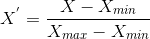                                      


Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0.

On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1.

If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler() 
df_norm_X = pd.DataFrame(norm.fit_transform(X),columns=X.columns)
df_norm_X.describe()

,Kitchen_Temp,Kitchen_Humidity,Living_room_Temp,Living_room_Humidity,Laundry_room Temp,Laundry_room_Humidity,Office_Temp,Office_Humidity,Bathroom_Temp,Bathroom_Humidity,Building_North_Temp,Building_North_Humidity,Ironing_room_Temp,Ironing _room_Humidity,Childrens_room_Temp,Childrens_room_Humidity,Parents_room_Temp,Parents_room_Humidity,Outside_Temp,Outside_Press,Outside_Humidity,Windspeed,Visibility,Dewpoint_Temp,rv1,rv2,Weekday,NSM
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.517061,0.364271,0.308303,0.561170,0.421038,0.489601,0.518499,0.485143,0.407272,0.317777,0.406809,0.542053,0.459671,0.432206,0.523873,0.457031,0.478234,0.512655,0.399089,0.609828,0.733558,0.288554,0.574321,0.468810,0.499742,0.499742,0.496208,0.500083
std,0.169595,0.109512,0.159412,0.114438,0.166676,0.152107,0.184044,0.185289,0.176266,0.135656,0.177277,0.314963,0.198868,0.181355,0.179081,0.179039,0.209647,0.171833,0.170978,0.172080,0.196067,0.175087,0.181457,0.189803,0.289984,0.289984,0.330936,0.290676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.419219,0.283735,0.195542,0.490299,0.298272,0.380122,0.399099,0.335894,0.281653,0.234337,0.282104,0.293478,0.311970,0.294326,0.410436,0.324423,0.323621,0.386313,0.278671,0.503101,0.609649,0.142857,0.430769,0.339367,0.249895,0.249895,0.166667,0.251748
50%,0.507920,0.347675,0.283499,0.563408,0.407112,0.456302,0.501502,0.458387,0.387960,0.289821,0.389026,0.548938,0.437637,0.413593,0.530363,0.437800,0.468262,0.485651,0.383173,0.623256,0.785088,0.261905,0.600000,0.453997,0.497934,0.497934,0.500000,0.503497
75%,0.613516,0.441519,0.392537,0.641016,0.505982,0.607260,0.630631,0.618722,0.505460,0.358586,0.504177,0.831412,0.585297,0.560284,0.648459,0.580398,0.594173,0.627956,0.495445,0.735659,0.890351,0.392857,0.600000,0.595777,0.751701,0.751701,0.833333,0.748252
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_norm_y = pd.DataFrame(norm.fit_transform(y),columns=y.columns)
df_norm_y.describe()

,Total_Energy_Consumption
count,19735.000000
mean,0.083179
std,0.094892
min,0.000000
25%,0.036364
50%,0.045455
75%,0.081818
max,1.000000


#**Standardization**
###What is Standardization?
>Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization:

>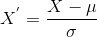

Feature scaling: 

image.png is the mean of the feature values and Feature scaling: image.png is the standard deviation of the feature values. Note that in this case, the values are not restricted to a particular range.

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_standardized_X = pd.DataFrame(std.fit_transform(X),columns=X.columns)
df_standardized_X.describe()

,Kitchen_Temp,Kitchen_Humidity,Living_room_Temp,Living_room_Humidity,Laundry_room Temp,Laundry_room_Humidity,Office_Temp,Office_Humidity,Bathroom_Temp,Bathroom_Humidity,Building_North_Temp,Building_North_Humidity,Ironing_room_Temp,Ironing _room_Humidity,Childrens_room_Temp,Childrens_room_Humidity,Parents_room_Temp,Parents_room_Humidity,Outside_Temp,Outside_Press,Outside_Humidity,Windspeed,Visibility,Dewpoint_Temp,rv1,rv2,Weekday,NSM
count,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04,1.973500e+04
mean,-6.731209e-15,4.354257e-18,2.432061e-15,-6.287232e-17,-1.700906e-15,9.850083e-15,-4.696904e-15,2.791945e-15,-4.057875e-15,-2.004815e-16,-2.688388e-16,-1.081163e-14,4.313527e-15,8.670147e-16,2.570250e-14,1.473933e-15,9.071414e-15,-5.965715e-15,1.914748e-16,1.017585e-14,-5.558642e-15,-2.773665e-15,-2.249233e-15,1.053820e-15,5.836617e-17,5.836617e-17,4.534841e-16,-2.908464e-18
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-3.048876e+00,-3.326400e+00,-1.934053e+00,-4.903811e+00,-2.526152e+00,-3.218882e+00,-2.817330e+00,-2.618372e+00,-2.310615e+00,-2.342578e+00,-2.294827e+00,-1.721052e+00,-2.311491e+00,-2.383264e+00,-2.925415e+00,-2.552753e+00,-2.281191e+00,-2.983513e+00,-2.334216e+00,-3.543953e+00,-3.741461e+00,-1.648099e+00,-3.165127e+00,-2.470045e+00,-1.723389e+00,-1.723389e+00,-1.499445e+00,-1.720456e+00
25%,-5.769346e-01,-7.354261e-01,-7.073769e-01,-6.193121e-01,-7.365738e-01,-7.197740e-01,-6.487730e-01,-8.055135e-01,-7.126873e-01,-6.150967e-01,-7.034708e-01,-7.892411e-01,-7.427257e-01,-7.602934e-01,-6.334538e-01,-7.406833e-01,-7.375077e-01,-7.352716e-01,-7.043079e-01,-6.202340e-01,-6.319890e-01,-8.321582e-01,-7.911227e-01,-6.820070e-01,-8.616111e-01,-8.616111e-01,-9.958104e-01,-8.543565e-01
50%,-5.390414e-02,-1.515563e-01,-1.556007e-01,1.955412e-02,-8.355234e-02,-2.189281e-01,-9.235610e-02,-1.444076e-01,-1.095679e-01,-2.060876e-01,-1.003153e-01,2.185997e-02,-1.107961e-01,-1.026318e-01,3.624193e-02,-1.074159e-01,-4.756539e-02,-1.571523e-01,-9.309242e-02,7.803464e-02,2.628230e-01,-1.522076e-01,1.415217e-01,-7.804751e-02,-6.234755e-03,-6.234755e-03,1.145842e-02,1.174329e-02
75%,5.687512e-01,7.054003e-01,5.284195e-01,6.977352e-01,5.096503e-01,7.735457e-01,6.092840e-01,7.209424e-01,5.570582e-01,3.008323e-01,5.492537e-01,9.187315e-01,6.317211e-01,7.062465e-01,6.957133e-01,6.890653e-01,5.530318e-01,6.710266e-01,5.635724e-01,7.312537e-01,7.997101e-01,5.957380e-01,1.415217e-01,6.689551e-01,8.688952e-01,8.688952e-01,1.018727e+00,8.537848e-01
max,2.847670e+00,5.805255e+00,4.339172e+00,3.834732e+00,3.473670e+00,3.355616e+00,2.616301e+00,2.778740e+00,3.362774e+00,5.029191e+00,3.346210e+00,1.454008e+00,2.717089e+00,3.130926e+00,2.658791e+00,3.032761e+00,2.488841e+00,2.836221e+00,3.514646e+00,2.267445e+00,1.358968e+00,4.063486e+00,2.345954e+00,2.798707e+00,1.725168e+00,1.725168e+00,1.522362e+00,1.719885e+00


In [ ]:
df_standardized_y = pd.DataFrame(std.fit_transform(y),columns=y.columns)
df_standardized_y.describe()

,Total_Energy_Consumption
count,1.973500e+04
mean,-8.404054e-16
std,1.000025e+00
min,-8.765896e-01
25%,-4.933678e-01
50%,-3.975623e-01
75%,-1.434048e-02
max,9.662011e+00


#**Robust Scaler**
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaled_X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
df_robust_scaled_X.describe()

,Kitchen_Temp,Kitchen_Humidity,Living_room_Temp,Living_room_Humidity,Laundry_room Temp,Laundry_room_Humidity,Office_Temp,Office_Humidity,Bathroom_Temp,Bathroom_Humidity,Building_North_Temp,Building_North_Humidity,Ironing_room_Temp,Ironing _room_Humidity,Childrens_room_Temp,Childrens_room_Humidity,Parents_room_Temp,Parents_room_Humidity,Outside_Temp,Outside_Press,Outside_Humidity,Windspeed,Visibility,Dewpoint_Temp,rv1,rv2,Weekday,NSM
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.047050,0.105187,0.125911,-0.014847,0.067044,0.146605,0.073412,0.094603,0.086291,0.225004,0.080078,-0.012799,0.080611,0.069982,-0.027267,0.075129,0.036857,0.111749,0.073424,-0.057740,-0.183574,0.106596,-0.151742,0.057772,0.003603,0.003603,-0.005688,-0.006875
std,0.872862,0.694064,0.809215,0.759293,0.802444,0.669666,0.794897,0.655129,0.787579,1.091815,0.798280,0.585504,0.727584,0.681894,0.752370,0.699441,0.774889,0.711105,0.788738,0.739944,0.698488,0.700349,1.072247,0.740232,0.577880,0.577880,0.496404,0.585446
min,-2.614130,-2.203488,-1.439114,-3.738184,-1.960000,-2.008916,-2.166018,-1.620724,-1.733455,-2.332594,-1.751791,-1.020457,-1.601149,-1.555111,-2.228205,-1.710327,-1.730769,-2.009788,-1.767614,-2.680000,-2.796875,-1.047619,-3.545455,-1.770588,-0.992285,-0.992285,-0.750000,-1.014085
25%,-0.456522,-0.405233,-0.446494,-0.485075,-0.524000,-0.335391,-0.442283,-0.433099,-0.474992,-0.446551,-0.481475,-0.474891,-0.459770,-0.448444,-0.503846,-0.442922,-0.534615,-0.411093,-0.482077,-0.516667,-0.625000,-0.476190,-1.000000,-0.447059,-0.494293,-0.494293,-0.500000,-0.507042
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.543478,0.594767,0.553506,0.514925,0.476000,0.664609,0.557717,0.566901,0.525008,0.553449,0.518525,0.525109,0.540230,0.551556,0.496154,0.557078,0.465385,0.588907,0.517923,0.483333,0.375000,0.523810,0.000000,0.552941,0.505707,0.505707,0.500000,0.492958
max,2.532609,4.134302,3.637146,2.896766,2.854400,2.393690,2.153048,1.914990,2.734675,5.715813,2.751223,0.838508,2.057471,2.204889,1.973077,2.196314,1.965385,2.128548,2.845488,1.620000,0.765625,2.952381,2.363636,2.129412,1.000518,1.000518,0.750000,1.000000


In [ ]:
df_robust_scaled_y = pd.DataFrame(scaler.fit_transform(y),columns=y.columns)
df_robust_scaled_y.describe()

,Total_Energy_Consumption
count,19735.000000
mean,0.829937
std,2.087617
min,-1.000000
25%,-0.200000
50%,0.000000
75%,0.800000
max,21.000000


#**Feature Selection**
Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster.

##**Univariate Analysis**


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(df_norm_X,y)

dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(df_norm_X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Kitchen_Temp,116.373832
1,Kitchen_Humidity,13.650600
2,Living_room_Temp,147.264676
3,Living_room_Humidity,9.835266
4,Laundry_room Temp,113.160642
5,Laundry_room_Humidity,27.418236
6,Office_Temp,124.869936
7,Office_Humidity,16.947088
8,Bathroom_Temp,134.127020
9,Bathroom_Humidity,21.199636


In [ ]:
#sorting in descending order
features_rank.nlargest(27,"Score")

,Features,Score
27,NSM,788.005723
11,Building_North_Humidity,283.373044
16,Parents_room_Temp,157.615333
14,Childrens_room_Temp,150.752962
2,Living_room_Temp,147.264676
12,Ironing_room_Temp,143.926053
8,Bathroom_Temp,134.127020
6,Office_Temp,124.869936
0,Kitchen_Temp,116.373832
4,Laundry_room Temp,113.160642


##**Feature Importance**

In [ ]:
#apllying ExtraTreesClassifier algorithm
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(df_norm_X,y)

feature_importance = pd.DataFrame(model.feature_importances_,columns=["Feat_importance"])
df_feat_importance = pd.concat([dfcolumns,feature_importance],axis=1)
df_feat_importance.columns=['Features','Score']
df_feat_importance

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Features,Score
0,Kitchen_Temp,0.032699
1,Kitchen_Humidity,0.037468
2,Living_room_Temp,0.036206
3,Living_room_Humidity,0.037756
4,Laundry_room Temp,0.032893
5,Laundry_room_Humidity,0.036648
6,Office_Temp,0.032404
7,Office_Humidity,0.036084
8,Bathroom_Temp,0.030357
9,Bathroom_Humidity,0.037699


In [ ]:
#sorting in descending order
df_feat_importance.nlargest(20,"Score")

,Features,Score
27,NSM,0.060670
15,Childrens_room_Humidity,0.039987
25,rv2,0.039845
24,rv1,0.039624
10,Building_North_Temp,0.039208
18,Outside_Temp,0.038790
17,Parents_room_Humidity,0.038695
20,Outside_Humidity,0.038318
23,Dewpoint_Temp,0.038059
3,Living_room_Humidity,0.037756


We can see that we are given an importance score for each attribute where the larger score the more important the attribute. 

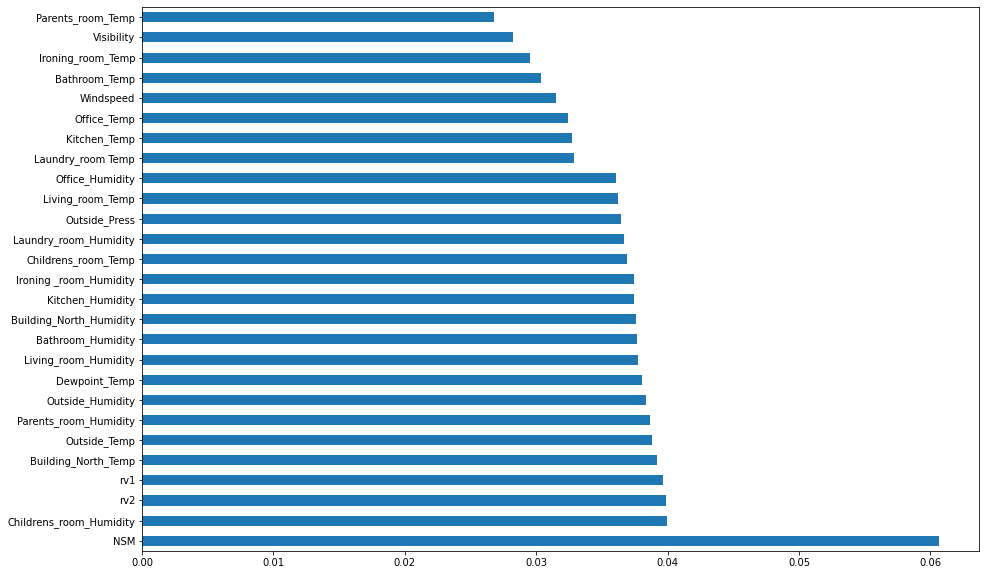

In [ ]:
#bar plot of feature importance
figure = plt.figure(figsize=(15,10))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(27).plot(kind='barh')
plt.show()

##**Multi-Collinearity**

In [ ]:
X.corr()

,Kitchen_Temp,Kitchen_Humidity,Living_room_Temp,Living_room_Humidity,Laundry_room Temp,Laundry_room_Humidity,Office_Temp,Office_Humidity,Bathroom_Temp,Bathroom_Humidity,Building_North_Temp,Building_North_Humidity,Ironing_room_Temp,Ironing _room_Humidity,Childrens_room_Temp,Childrens_room_Humidity,Parents_room_Temp,Parents_room_Humidity,Outside_Temp,Outside_Press,Outside_Humidity,Windspeed,Visibility,Dewpoint_Temp,rv1,rv2,Weekday,NSM
Kitchen_Temp,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.001381,0.178728
Kitchen_Humidity,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,-0.053782,0.018531
Living_room_Temp,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.000602,0.254569
Living_room_Humidity,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.044249,-0.183182
Laundry_room Temp,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,-0.017514,0.037607
Laundry_room_Humidity,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.035182,-0.052343
Office_Temp,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,-0.091006,0.088334
Office_Humidity,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.005749,-0.019040
Bathroom_Temp,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,0.032786,0.629161,-0.632384,0.870624,0.148905,0.824981,0.016388,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490,-0.040827,0.071282
Bathroom_Humidity,-0.014782,0.303258,0.029595,0.250271,-0.066355,0.375422,-0.076489,0.352591,0.032786,1.000000,-0.078337,0.263797,-0.142823,0.325808,-0.086991,0.359840,-0.138509,0.272197,-0.053126,-0.119327,0.185941,0.082044,-0.013133,0.078175,-0.011056,-0.011056,0.008096,0.097242


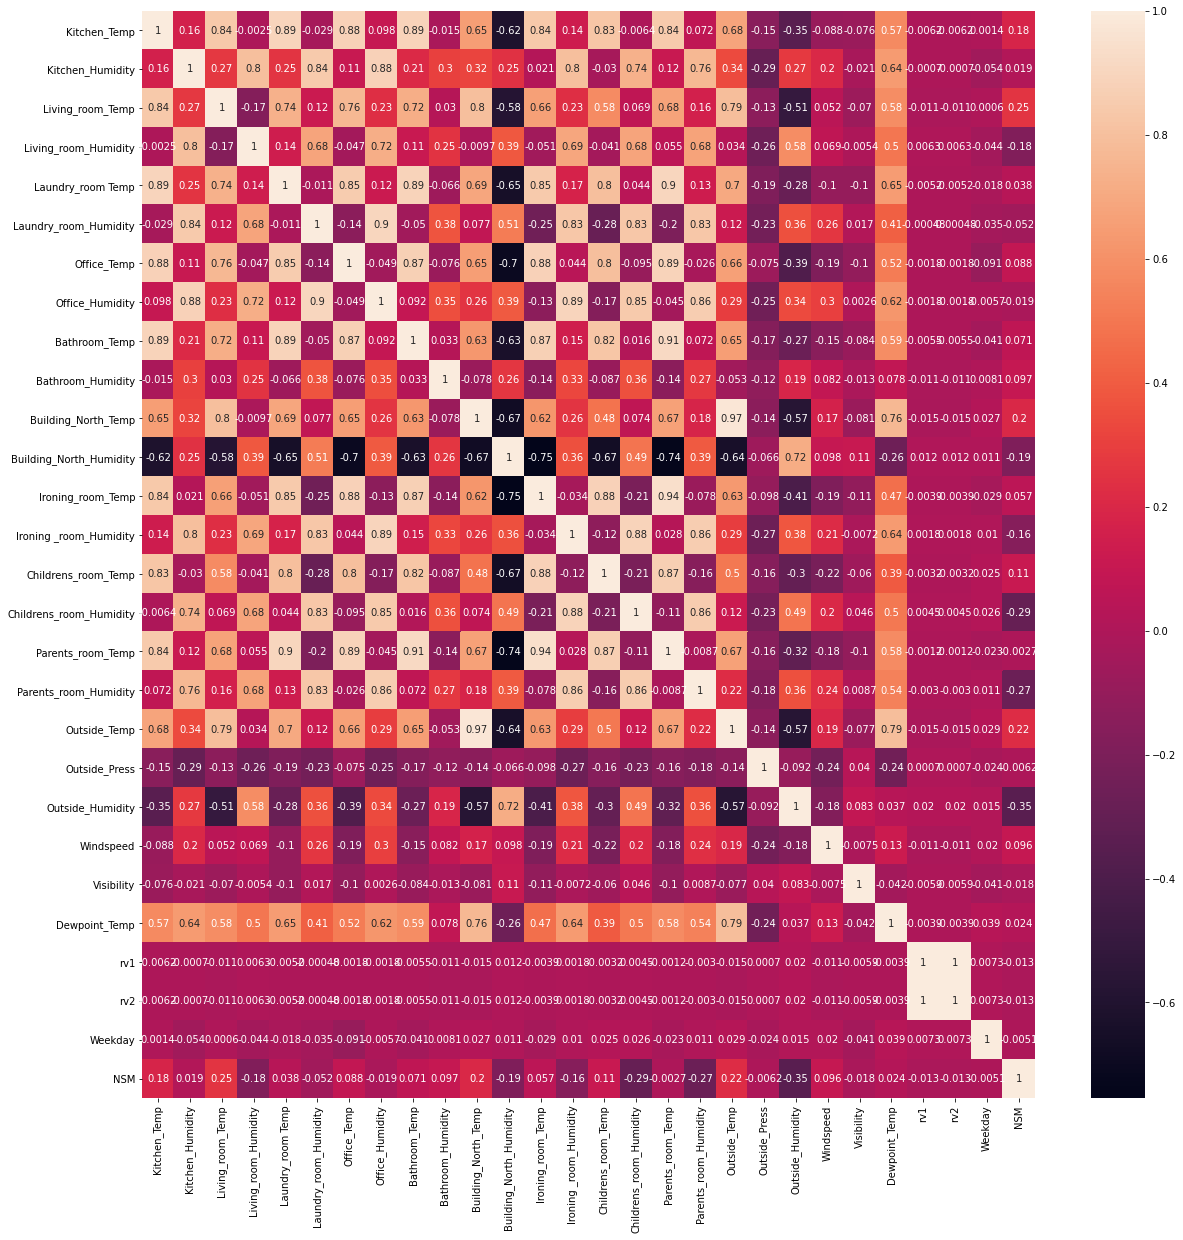

In [ ]:
import seaborn as sns
corr=X.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X[top_features].corr(),annot=True)

In [ ]:
threshold=0.5

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(X,threshold)

{'Bathroom_Temp',
 'Building_North_Humidity',
 'Building_North_Temp',
 'Childrens_room_Humidity',
 'Childrens_room_Temp',
 'Dewpoint_Temp',
 'Ironing _room_Humidity',
 'Ironing_room_Temp',
 'Laundry_room Temp',
 'Laundry_room_Humidity',
 'Living_room_Humidity',
 'Living_room_Temp',
 'Office_Humidity',
 'Office_Temp',
 'Outside_Humidity',
 'Outside_Temp',
 'Parents_room_Humidity',
 'Parents_room_Temp',
 'rv2'}

In [ ]:
len(correlation(X,threshold))

19

##**OLS LINEAR REGRESSION**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###**TEST 1**
Applying OLS on ***normalized*** data, subsequently some features would be eliminated to improve our fit.

In [ ]:
#splitting normalized data

X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(
    df_norm_X,df_norm_y, test_size=0.3, random_state=0)

X_norm_train.head(),y_norm_train.shape,X_norm_test.shape,y_norm_test.shape

(       Kitchen_Temp  Kitchen_Humidity  ...   Weekday       NSM
 3766       0.648011          0.482616  ...  0.833333  0.867133
 9503       0.633580          0.128704  ...  0.500000  0.706294
 10946      0.637100          0.253371  ...  1.000000  0.727273
 10393      0.613516          0.334098  ...  0.333333  0.888112
 15274      0.493488          0.394551  ...  0.166667  0.783217
 
 [5 rows x 28 columns], (13814, 1), (5921, 28), (5921, 1))

In [ ]:
print(X_norm_test)

       Kitchen_Temp  Kitchen_Humidity  ...   Weekday       NSM
15563      0.465681          0.172461  ...  0.500000  0.790210
12564      0.527983          0.315843  ...  0.500000  0.965035
10649      0.591341          0.395377  ...  0.666667  0.664336
16554      0.761352          0.089074  ...  0.500000  0.671329
8130       0.344245          0.308825  ...  0.166667  0.167832
...             ...               ...  ...       ...       ...
7952       0.349525          0.319329  ...  1.000000  0.937063
7472       0.453613          0.287497  ...  0.500000  0.601399
7157       0.335093          0.238785  ...  0.166667  0.412587
3393       0.444562          0.412164  ...  0.500000  0.272727
5187       0.521647          0.200991  ...  0.166667  0.734266

[5921 rows x 28 columns]


In [ ]:
def OLS(DataFrame_X,DataFrame_y):
    X_with_constant = sm.add_constant(DataFrame_X)
    model_variables = sm.OLS(DataFrame_y, DataFrame_X)

    results = model_variables.fit()
    print(results.summary())

In [ ]:
#modelling on normalized vectors
OLS(X_norm_train,y_norm_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.530
Model:                                  OLS   Adj. R-squared (uncentered):              0.529
Method:                       Least Squares   F-statistic:                              576.3
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:21   Log-Likelihood:                          14374.
No. Observations:                     13814   AIC:                                 -2.869e+04
Df Residuals:                         13787   BIC:                                 -2.849e+04
Df Model:                                27                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

Dropping features one-by-one of the Normalized data based on P-value from the above results.

In [ ]:
def column_name(DataFrame):
    for col in enumerate(DataFrame):
        print(col)

In [ ]:
#dropping feature Ironing room Temperature
X_norm_train_IT = X_norm_train.drop("Ironing_room_Temp",axis=1)
OLS(X_norm_train_IT, y_norm_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.530
Model:                                  OLS   Adj. R-squared (uncentered):              0.529
Method:                       Least Squares   F-statistic:                              598.4
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:21   Log-Likelihood:                          14373.
No. Observations:                     13814   AIC:                                 -2.869e+04
Df Residuals:                         13788   BIC:                                 -2.850e+04
Df Model:                                26                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
#from above results the next feature to be eliminated is Bathroom 
#Temperature

X_norm_train_BT = X_norm_train_IT.drop(["Bathroom_Temp"],axis=1)
OLS(X_norm_train_BT,y_norm_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.530
Model:                                  OLS   Adj. R-squared (uncentered):              0.529
Method:                       Least Squares   F-statistic:                              622.4
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:22   Log-Likelihood:                          14373.
No. Observations:                     13814   AIC:                                 -2.870e+04
Df Residuals:                         13789   BIC:                                 -2.851e+04
Df Model:                                25                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
#eliminating Kitchen Temperature
X_norm_train_KT = X_norm_train_BT.drop(["Kitchen_Temp"],axis=1)
OLS(X_norm_train_KT,y_norm_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.530
Model:                                  OLS   Adj. R-squared (uncentered):              0.529
Method:                       Least Squares   F-statistic:                              648.2
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:22   Log-Likelihood:                          14372.
No. Observations:                     13814   AIC:                                 -2.870e+04
Df Residuals:                         13790   BIC:                                 -2.852e+04
Df Model:                                24                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
#elimnating rv1

X_norm_train_rv1 = X_norm_train_KT.drop(["rv1"],axis=1)
OLS(X_norm_train_rv1,y_norm_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.530
Model:                                  OLS   Adj. R-squared (uncentered):              0.529
Method:                       Least Squares   F-statistic:                              648.2
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:22   Log-Likelihood:                          14372.
No. Observations:                     13814   AIC:                                 -2.870e+04
Df Residuals:                         13790   BIC:                                 -2.852e+04
Df Model:                                24                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
#eliminating rv2

X_norm_train_rv2 = X_norm_train_rv1.drop(["rv2"],axis=1)
OLS(X_norm_train_rv2,y_norm_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.530
Model:                                  OLS   Adj. R-squared (uncentered):              0.529
Method:                       Least Squares   F-statistic:                              676.4
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:22   Log-Likelihood:                          14372.
No. Observations:                     13814   AIC:                                 -2.870e+04
Df Residuals:                         13791   BIC:                                 -2.853e+04
Df Model:                                23                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
#eliminating outside pressure

X_norm_train_Press = X_norm_train_rv2.drop(["Outside_Press"],axis=1)
OLS(X_norm_train_Press,y_norm_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.530
Model:                                  OLS   Adj. R-squared (uncentered):              0.529
Method:                       Least Squares   F-statistic:                              706.4
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:22   Log-Likelihood:                          14368.
No. Observations:                     13814   AIC:                                 -2.869e+04
Df Residuals:                         13792   BIC:                                 -2.853e+04
Df Model:                                22                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
#eliminating outside humidity

X_norm_train_OH = X_norm_train_Press.drop(["Outside_Humidity"],axis=1)
OLS(X_norm_train_OH,y_norm_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.528
Model:                                  OLS   Adj. R-squared (uncentered):              0.527
Method:                       Least Squares   F-statistic:                              735.3
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:22   Log-Likelihood:                          14344.
No. Observations:                     13814   AIC:                                 -2.865e+04
Df Residuals:                         13793   BIC:                                 -2.849e+04
Df Model:                                21                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
#eliminating Bathroom Humidity

X_norm_train_BH = X_norm_train_OH.drop(["Bathroom_Humidity"],axis=1)
OLS(X_norm_train_BH,y_norm_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.528
Model:                                  OLS   Adj. R-squared (uncentered):              0.527
Method:                       Least Squares   F-statistic:                              771.5
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:22   Log-Likelihood:                          14341.
No. Observations:                     13814   AIC:                                 -2.864e+04
Df Residuals:                         13794   BIC:                                 -2.849e+04
Df Model:                                20                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
#eliminating Parent's room humidity

X_norm_train_PH = X_norm_train_BH.drop(["Parents_room_Humidity"],axis=1)
OLS(X_norm_train_PH,y_norm_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.528
Model:                                  OLS   Adj. R-squared (uncentered):              0.527
Method:                       Least Squares   F-statistic:                              811.8
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:22   Log-Likelihood:                          14340.
No. Observations:                     13814   AIC:                                 -2.864e+04
Df Residuals:                         13795   BIC:                                 -2.850e+04
Df Model:                                19                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

###**TEST 2**
Applying OLS to ***Standardized*** data

In [ ]:
#splitting standardized data

X_standard_train, X_standard_test, y_standard_train, y_standard_test = train_test_split(df_standardized_X,df_standardized_y, 
                                                    test_size=0.30, 
                                                    random_state=0)
X_standard_train,y_standard_train.shape,X_standard_test.shape,y_standard_test.shape

(       Kitchen_Temp  Kitchen_Humidity  ...   Weekday       NSM
 3766       0.772152          1.080685  ...  1.018727  1.262776
 9503       0.687056         -2.151122  ...  0.011458  0.709435
 10946      0.707811         -1.012701  ...  1.522362  0.781610
 10393      0.568751         -0.275534  ... -0.492176  1.334951
 15274     -0.139000          0.276503  ... -0.995810  0.974076
 ...             ...               ...  ...       ...       ...
 13123      0.687056          1.115868  ... -1.499445  1.190601
 19648      1.461224          1.156077  ...  0.515093 -1.191173
 9845      -0.012394         -1.047884  ...  1.522362 -1.455815
 10799      0.126666          0.412209  ...  1.018727  0.709435
 2732      -0.495989          0.879640  ...  1.018727  0.637260
 
 [13814 rows x 28 columns], (13814, 1), (5921, 28), (5921, 1))

In [ ]:
#modelling on standardized data
OLS(X_standard_train, y_standard_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.166
Model:                                  OLS   Adj. R-squared (uncentered):              0.164
Method:                       Least Squares   F-statistic:                              101.6
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:22   Log-Likelihood:                         -18148.
No. Observations:                     13814   AIC:                                  3.635e+04
Df Residuals:                         13787   BIC:                                  3.655e+04
Df Model:                                27                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
X_standard_train_IT = X_standard_train.drop(["Ironing_room_Temp"],axis=1)
OLS(X_standard_train_IT,y_standard_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.166
Model:                                  OLS   Adj. R-squared (uncentered):              0.164
Method:                       Least Squares   F-statistic:                              105.5
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:22   Log-Likelihood:                         -18148.
No. Observations:                     13814   AIC:                                  3.635e+04
Df Residuals:                         13788   BIC:                                  3.654e+04
Df Model:                                26                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
X_standard_train_BT = X_standard_train_IT.drop(["Bathroom_Temp"],axis=1)
OLS(X_standard_train_BT,y_standard_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.166
Model:                                  OLS   Adj. R-squared (uncentered):              0.164
Method:                       Least Squares   F-statistic:                              109.7
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:23   Log-Likelihood:                         -18148.
No. Observations:                     13814   AIC:                                  3.635e+04
Df Residuals:                         13789   BIC:                                  3.653e+04
Df Model:                                25                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
X_standard_train_KT = X_standard_train_BT.drop(["Kitchen_Temp"],axis=1)
OLS(X_standard_train_KT,y_standard_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.166
Model:                                  OLS   Adj. R-squared (uncentered):              0.164
Method:                       Least Squares   F-statistic:                              114.3
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:23   Log-Likelihood:                         -18148.
No. Observations:                     13814   AIC:                                  3.634e+04
Df Residuals:                         13790   BIC:                                  3.653e+04
Df Model:                                24                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
X_standard_train_rv1 = X_standard_train_KT.drop(["rv1"],axis=1)
OLS(X_standard_train_rv1,y_standard_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.166
Model:                                  OLS   Adj. R-squared (uncentered):              0.164
Method:                       Least Squares   F-statistic:                              114.3
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:23   Log-Likelihood:                         -18148.
No. Observations:                     13814   AIC:                                  3.634e+04
Df Residuals:                         13790   BIC:                                  3.653e+04
Df Model:                                24                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
X_standard_train_rv2 = X_standard_train_rv1.drop(["rv2"],axis=1)
OLS(X_standard_train_rv2,y_standard_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.166
Model:                                  OLS   Adj. R-squared (uncentered):              0.164
Method:                       Least Squares   F-statistic:                              119.2
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:23   Log-Likelihood:                         -18149.
No. Observations:                     13814   AIC:                                  3.634e+04
Df Residuals:                         13791   BIC:                                  3.652e+04
Df Model:                                23                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
X_standard_train_Press = X_standard_train_rv2.drop(["Outside_Press"],axis=1)
OLS(X_standard_train_Press,y_standard_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.166
Model:                                  OLS   Adj. R-squared (uncentered):              0.164
Method:                       Least Squares   F-statistic:                              124.5
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:23   Log-Likelihood:                         -18150.
No. Observations:                     13814   AIC:                                  3.634e+04
Df Residuals:                         13792   BIC:                                  3.651e+04
Df Model:                                22                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
X_standard_train_OH = X_standard_train_Press.drop(["Outside_Humidity"],axis=1)
OLS(X_standard_train_OH,y_standard_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.165
Model:                                  OLS   Adj. R-squared (uncentered):              0.164
Method:                       Least Squares   F-statistic:                              130.3
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:23   Log-Likelihood:                         -18152.
No. Observations:                     13814   AIC:                                  3.635e+04
Df Residuals:                         13793   BIC:                                  3.650e+04
Df Model:                                21                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

In [ ]:
X_standard_train_PH = X_standard_train_OH.drop(["Parents_room_Humidity"],axis=1)
OLS(X_standard_train_PH,y_standard_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.165
Model:                                  OLS   Adj. R-squared (uncentered):              0.164
Method:                       Least Squares   F-statistic:                              136.6
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:23   Log-Likelihood:                         -18153.
No. Observations:                     13814   AIC:                                  3.635e+04
Df Residuals:                         13794   BIC:                                  3.650e+04
Df Model:                                20                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

###**TEST 3**
Applying ols to ***Robust scaled*** data.

In [ ]:
#splitting robust scaled data
X_robust_train, X_robust_test, y_robust_train, y_robust_test = train_test_split(df_standardized_X,df_standardized_y, 
                                                    test_size=0.30, 
                                                    random_state=0)
X_robust_train,y_robust_train.shape,X_robust_test.shape,y_robust_test.shape

(       Kitchen_Temp  Kitchen_Humidity  ...   Weekday       NSM
 3766       0.772152          1.080685  ...  1.018727  1.262776
 9503       0.687056         -2.151122  ...  0.011458  0.709435
 10946      0.707811         -1.012701  ...  1.522362  0.781610
 10393      0.568751         -0.275534  ... -0.492176  1.334951
 15274     -0.139000          0.276503  ... -0.995810  0.974076
 ...             ...               ...  ...       ...       ...
 13123      0.687056          1.115868  ... -1.499445  1.190601
 19648      1.461224          1.156077  ...  0.515093 -1.191173
 9845      -0.012394         -1.047884  ...  1.522362 -1.455815
 10799      0.126666          0.412209  ...  1.018727  0.709435
 2732      -0.495989          0.879640  ...  1.018727  0.637260
 
 [13814 rows x 28 columns], (13814, 1), (5921, 28), (5921, 1))

In [ ]:
OLS(X_robust_train,y_robust_train)

                                    OLS Regression Results                                   
Dep. Variable:     Total_Energy_Consumption   R-squared (uncentered):                   0.166
Model:                                  OLS   Adj. R-squared (uncentered):              0.164
Method:                       Least Squares   F-statistic:                              101.6
Date:                      Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                              12:19:23   Log-Likelihood:                         -18148.
No. Observations:                     13814   AIC:                                  3.635e+04
Df Residuals:                         13787   BIC:                                  3.655e+04
Df Model:                                27                                                  
Covariance Type:                  nonrobust                                                  
                              coef    std err          t    

The R2 and adjusted R2 of the Robust scaled data is similar to the normalized and standardized data.So we'll not carry the evaluation further.


#**Linear Regression** (on features selected by OLS variables)

From the above section, after applying OLS method we have some optimal features in our hand.

Now, we'll perform Linear Regression for prediction.

In [ ]:
X_norm_train_PH.columns

Index(['Kitchen_Humidity', 'Living_room_Temp', 'Living_room_Humidity',
       'Laundry_room Temp', 'Laundry_room_Humidity', 'Office_Temp',
       'Office_Humidity', 'Building_North_Temp', 'Building_North_Humidity',
       'Ironing _room_Humidity', 'Childrens_room_Temp',
       'Childrens_room_Humidity', 'Parents_room_Temp', 'Outside_Temp',
       'Windspeed', 'Visibility', 'Dewpoint_Temp', 'Weekday', 'NSM'],
      dtype='object')

In [ ]:
#new DataFrame based on the selected features from OLS method

X_norm_test1 = X_norm_test[['Kitchen_Humidity', 'Living_room_Temp', 
                           'Living_room_Humidity','Laundry_room Temp',
                           'Laundry_room_Humidity', 'Office_Temp',
                           'Office_Humidity', 'Building_North_Temp',
                           'Building_North_Humidity','Ironing _room_Humidity',
                           'Childrens_room_Temp','Childrens_room_Humidity',
                           'Parents_room_Temp', 'Outside_Temp','Windspeed',
                           'Visibility', 'Dewpoint_Temp', 'Weekday', 'NSM']]     
print(X_norm_test1.head())

       Kitchen_Humidity  Living_room_Temp  ...   Weekday       NSM
15563          0.172461          0.270657  ...  0.500000  0.790210
12564          0.315843          0.247153  ...  0.500000  0.965035
10649          0.395377          0.298037  ...  0.666667  0.664336
16554          0.089074          0.602617  ...  0.500000  0.671329
8130           0.308825          0.109038  ...  0.166667  0.167832

[5 rows x 19 columns]


In [ ]:
# Modelling, training and prediction
lm = LinearRegression()
lm.fit(X_norm_train_PH,y_norm_train)
y_hat = lm.predict(X_norm_test1)
y_hat

array([[0.18161933],
       [0.08858662],
       [0.12410486],
       ...,
       [0.08739976],
       [0.08876207],
       [0.11885422]])

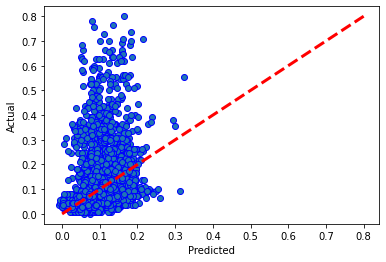

In [ ]:
#visulaizing the fit of our model

fig, ax = plt.subplots()
ax.scatter(y_hat, y_norm_test, edgecolors=(0, 0, 1))
ax.plot([y_norm_test.min(), y_norm_test.max()], [y_norm_test.min(), y_norm_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_norm_test, y_hat)
mse = metrics.mean_squared_error(y_norm_test, y_hat)
rmse = math.sqrt(mse)
r2 = metrics.r2_score(y_norm_test, y_hat)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.05122572864153578
RMSE is 0.09065461534063633
R2 score is 0.1440389894716323


R2 is very low. So, we'll perform Cross-Validation to the model and see if the score improves or not.

In [ ]:
from sklearn.model_selection import cross_val_score

def cross_validation(X, y):
    score = cross_val_score(lm, X, y,cv=5, scoring="r2")
    print('R_squared Mean Score:',score.mean())
    print(score)
cross_validation(X_norm_test1,y_norm_test)

R_squared Mean Score: 0.14246391291695157
[0.13692836 0.15607886 0.13995194 0.13078106 0.14857934]


There's some improvment seen after cross-validation.

We have R2 score of 0.156

#**Polynomial Regression**
So, our model didn't fit well for Linear Regression. Maybe te relationship between dependent and independent variable is non-linear. Therefore, we'll try Polynomial Regression.

In [ ]:
# Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_norm_train_PH)
linreg_2 = LinearRegression()
linreg_2.fit(X_poly, y_norm_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# X_poly2 = poly_reg.fit_transform(X_norm_test1)
# linreg_2.fit(X_poly2, y_norm_test)
# pr_yhat = linreg_2.predict(X_norm_test1)

ValueError: ignored

In [ ]:
# #Visualizing the Polymonial Regression results
# def viz_polymonial():
#     plt.scatter(y_norm_test, y_norm_train, color='red')
#     plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X_norm_test)),
#              color='blue')
#     plt.title('Truth or Bluff (Linear Regression)')
#     plt.xlabel('Position level')
#     plt.ylabel('Salary')
#     plt.show()
#     return
# viz_polymonial()

In [ ]:
#poly_reg.predict(poly_reg.fit_transfrom(X_norm_test))

#**Recursive Feature Elimination**
RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.

Technically, RFE is a wrapper-style feature selection algorithm that also uses filter-based feature selection internally.

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.


>We will evaluate the pipeline with a decision tree using repeated k-fold cross-validation, with three repeats and 10 folds.

>We will report the mean absolute error (MAE) of the model across all repeats and folds. The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. This means that larger negative MAE are better and a perfect model has a MAE of 0.

In [ ]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_norm_train, y_norm_train, 
                           scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1,
                           error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.036 (0.002)


In [ ]:
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=20, step=1)
selector = selector.fit(X_norm_train, y_norm_train.values)
selector.support_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False])

In [ ]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1,
       3, 1, 7, 8, 6, 2])

In [ ]:
for i in range(X_norm_train.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, selector.support_[i],
                                                selector.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 4.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 5.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected False, Rank: 9.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 3.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 7.000
Column: 25, Selected False, Ra

##**Explore Base Algorithm**

There are many algorithms that can be used in the core RFE, as long as they provide some indication of variable importance.

Most decision tree algorithms are likely to report the same general trends in feature importance, but this is not guaranteed. It might be helpful to explore the use of different algorithms wrapped by RFE.



In [ ]:
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from matplotlib import pyplot

# estimator = DecisionTreeClassifier()
# selector = RFE(estimator, n_features_to_select=20, step=1)
# selector = selector.fit(X_norm_train, y_norm_train)
# selector.support_

In [ ]:
# from sklearn.model_selection import RepeatedStratifiedKFold

# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	# lr
# 	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
# 	model = DecisionTreeClassifier()
# 	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# perceptron
# 	rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
# 	model = DecisionTreeClassifier()
# 	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# cart
# 	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# 	model = DecisionTreeClassifier()
# 	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# rf
# 	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
# 	model = DecisionTreeClassifier()
# 	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	# gbm
# 	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
# 	model = DecisionTreeClassifier()
# 	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
# 	return models

# # evaluate a give model using cross-validation
# def evaluate_model(model, X, y):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	scores = cross_val_score(model, X_norm_train, y_norm_train,
#                           scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores

# # define dataset
# #X, y = get_dataset()
# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
# 	scores = evaluate_model(model, X_norm_train, y_norm_train)
# 	results.append(scores)
# 	names.append(name)
# 	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

#**Linear Regression** (on variables selected after RFE)

First we'll need list of predictor and target variables.


In [ ]:
X_norm_test.columns

Index(['Kitchen_Temp', 'Kitchen_Humidity', 'Living_room_Temp',
       'Living_room_Humidity', 'Laundry_room Temp', 'Laundry_room_Humidity',
       'Office_Temp', 'Office_Humidity', 'Bathroom_Temp', 'Bathroom_Humidity',
       'Building_North_Temp', 'Building_North_Humidity', 'Ironing_room_Temp',
       'Ironing _room_Humidity', 'Childrens_room_Temp',
       'Childrens_room_Humidity', 'Parents_room_Temp', 'Parents_room_Humidity',
       'Outside_Temp', 'Outside_Press', 'Outside_Humidity', 'Windspeed',
       'Visibility', 'Dewpoint_Temp', 'rv1', 'rv2', 'Weekday', 'NSM'],
      dtype='object')

In [ ]:
# creating our X and y varibles for prediction

X2_train = X_norm_train[['Kitchen_Temp', 'Kitchen_Humidity', 'Living_room_Temp',
       'Living_room_Humidity', 'Laundry_room Temp', 'Laundry_room_Humidity',
       'Office_Temp', 'Office_Humidity', 'Bathroom_Temp',
       'Building_North_Temp', 'Ironing_room_Temp',
       'Ironing _room_Humidity', 'Childrens_room_Temp',
       'Childrens_room_Humidity', 'Parents_room_Temp', 'Parents_room_Humidity',
       'Outside_Temp', 'Outside_Humidity', 'Windspeed',
       'Dewpoint_Temp']]
y2_train = y_norm_train

X2_test = X_norm_test[['Kitchen_Temp', 'Kitchen_Humidity', 'Living_room_Temp',
       'Living_room_Humidity', 'Laundry_room Temp', 'Laundry_room_Humidity',
       'Office_Temp', 'Office_Humidity', 'Bathroom_Temp',
       'Building_North_Temp', 'Ironing_room_Temp',
       'Ironing _room_Humidity', 'Childrens_room_Temp',
       'Childrens_room_Humidity', 'Parents_room_Temp', 'Parents_room_Humidity',
       'Outside_Temp', 'Outside_Humidity', 'Windspeed',
       'Dewpoint_Temp']]
y2_test = y_norm_test
print(X2_train, y2_train,X2_test,y2_test)

       Kitchen_Temp  Kitchen_Humidity  ...  Windspeed  Dewpoint_Temp
3766       0.648011          0.482616  ...   0.642857       0.517345
9503       0.633580          0.128704  ...   0.345238       0.291101
10946      0.637100          0.253371  ...   0.690476       0.453997
10393      0.613516          0.334098  ...   0.142857       0.497738
15274      0.493488          0.394551  ...   0.476190       0.257919
...             ...               ...  ...        ...            ...
13123      0.633580          0.486469  ...   0.047619       0.769985
19648      0.764872          0.490872  ...   0.214286       0.808446
9845       0.514960          0.249518  ...   0.214286       0.395928
10799      0.538543          0.409412  ...   0.452381       0.677225
2732       0.432946          0.460600  ...   0.428571       0.444947

[13814 rows x 20 columns]        Total_Energy_Consumption
3766                   0.100000
9503                   0.081818
10946                  0.045455
10393            

In [ ]:
lin3 = LinearRegression()
lin3.fit(X2_train,y2_train)
y_hat2 = lin3.predict(X2_test)

# model evaluation for testing set

mae = metrics.mean_absolute_error(y2_test, y_hat2)
mse = metrics.mean_squared_error(y2_test, y_hat2)
rmse = math.sqrt(mse)
r2 = metrics.r2_score(y2_test, y_hat2)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.05140578860718404
RMSE is 0.09112628644131908
R2 score is 0.135108779606131


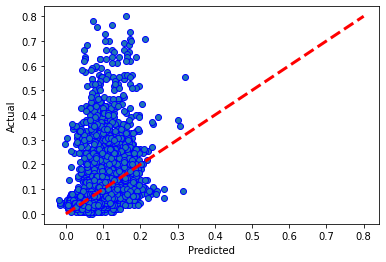

In [ ]:
#visualizing the fit of our model

fig, ax = plt.subplots()
ax.scatter(y_hat2, y2_test, edgecolors=(0, 0, 1))
ax.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()],
        'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()